# **K Means Clustering**


In [71]:
import numpy as np

In [72]:
np.random.seed(0)

N=2000
data1=np.random.randn(N//3,2)+np.array([2,2])   # 666 noraml distribution in r^2 centered at mean 0 and var but we add a array of 2 and variance of 2
data2=np.random.randn(N//3,2)+np.array([-3,-3]) # similarly with mean -3, var -3
data3=np.random.randn(N//3,2)+np.array([-5,3])
X= np.concatenate((data1,data2,data3))
X , len(X)


(array([[ 3.76405235,  2.40015721],
        [ 2.97873798,  4.2408932 ],
        [ 3.86755799,  1.02272212],
        ...,
        [-6.46836696,  3.5764787 ],
        [-4.93469439,  2.2264872 ],
        [-4.60505181,  2.49611011]]),
 1998)

In [73]:
X=X.T
X.shape[0], X.shape[1] # no of features,datapoints

(2, 1998)

In [74]:
import matplotlib.pyplot as plt

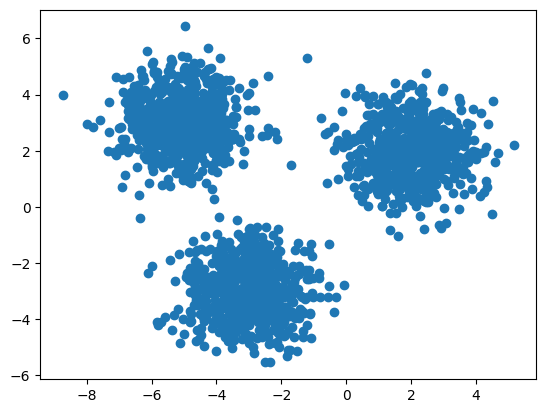

In [75]:
plt.scatter(X[0,:],X[1:])

In [76]:
# k=3
k=3
# X is a dxn matrix
center1=X[:,200]
print(center1.shape)
center2=X[:,800]
center3=X[:,1200]
means=np.array([center1,center2,center3]).T
means.shape,means

(2,)


((2, 3),
 array([[ 1.40134606, -2.56922887, -2.84782302],
        [ 0.88410301, -3.14989159, -3.37412632]]))

In [77]:
Z=np.zeros(X.shape[1])
# print(Z)
def assign_clusters(k,means):
  d,n=X.shape
  for i in range(n):
    Z[i]=np.argmin(np.linalg.norm(means-X[:,i].reshape(d,1),axis=0))  # np.argmin gives the index of the means matrix and first we remove the norm for
                                                                      #each after minusing the means and min values index gets assigned
  return Z

Z=assign_clusters(k,means)
Z.mean()



np.float64(0.7107107107107107)

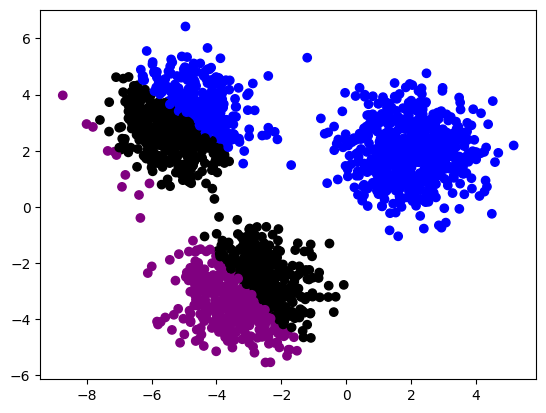

In [78]:
def plot(Z):
  Z=Z.astype(int) # converts the datatype
  colors=np.array(['blue','black','purple'])
  plt.scatter(X[0,:],X[1,:],c=colors[Z])
plot(Z)

In [79]:
def compute_new_means(X,Z,k):
  for j in range(k):
    if np.any(X[:,Z==j]):  # very important are there any datapoints belonging to jth cluster
      means[:,j]=np.mean(X[:,Z==j],axis=1)
  return means
means=compute_new_means(X,Z,k)
means

array([[ 0.15243752, -4.09339723, -3.71658966],
       [ 2.47002787,  0.26891354, -3.31569723]])

In [80]:
means.mean(axis=1)

array([-2.55251646, -0.19225194])

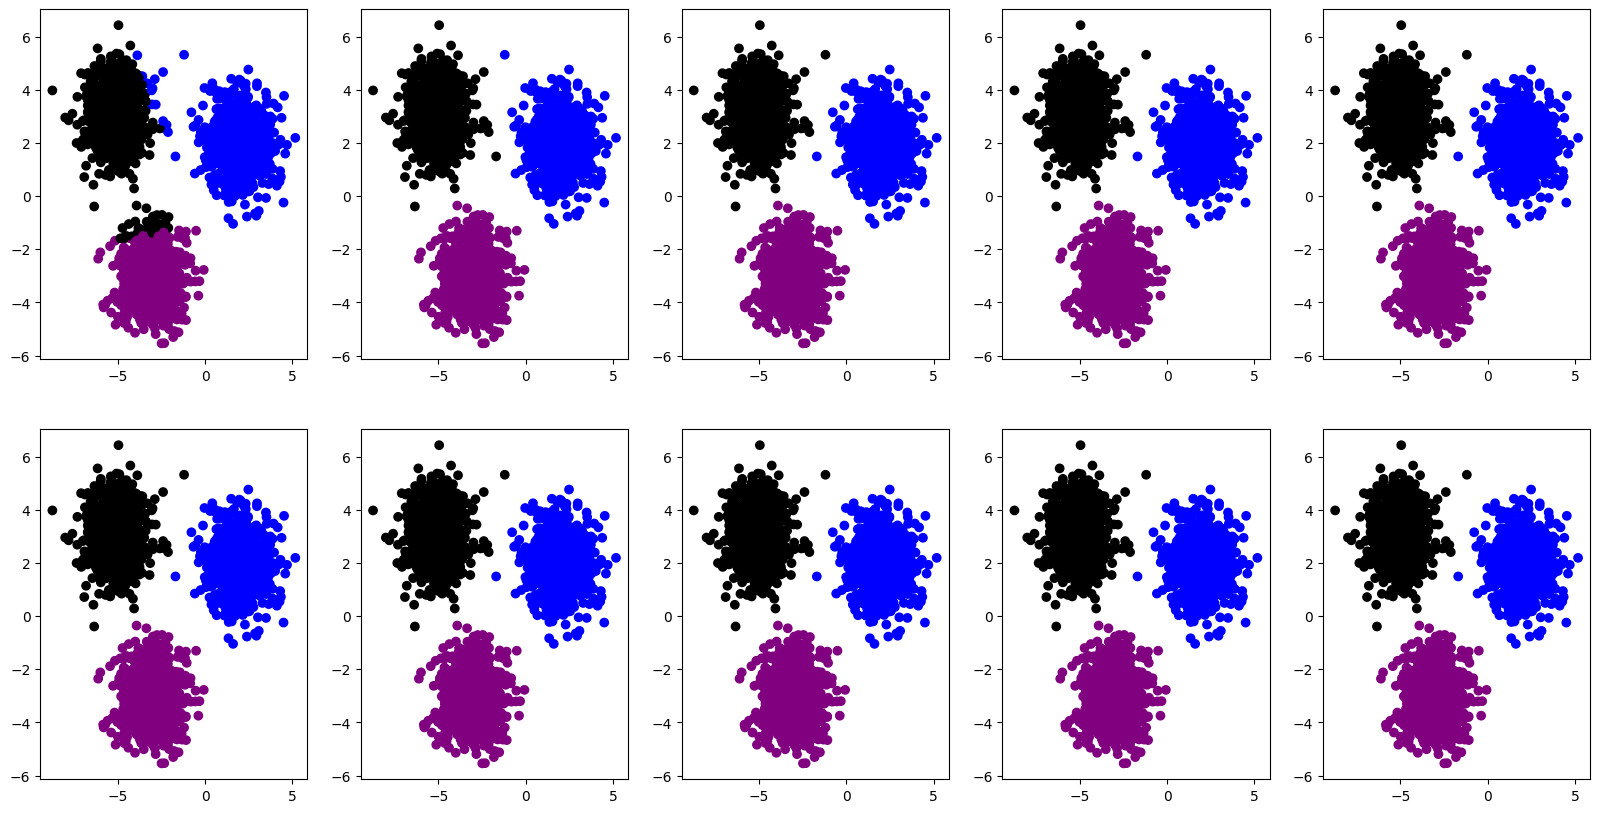

In [81]:
plt.figure(figsize=(20,10))
for i in range(10):
  Z=assign_clusters(k,means)  # cluster assignment for ith iter
  plt.subplot(2,5,i+1)   # subplot of 2 rows and 5 cols
  plot(Z)
  means=compute_new_means(X,Z,k) # recalculation of means
plt.show()